# load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import re



In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore")


# 1. Data Exploration

In [3]:
dataset = pd.read_csv('MobileData.csv')

np.random.seed(1) # to get the same random result every time
dataset.sample(n=10)

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
499,583,Infinix Note 12 Pro,Tuscany Blue,256,8,5000,108MP,16MP,1,17.02,Mediatek Helio G99,"16,999"
486,566,SAMSUNG Galaxy A23,Peach,128,6,5000,50MP,8MP,0,16.76,Octa-core(EXYNOS),"17,499"
65,65,SAMSUNG Galaxy F14 5G,GOAT Green,128,6,6000,50MP,13MP,0,16.76,"Exynos 1330, Octa Core","14,490"
41,41,REDMI 10,Caribbean Green,128,6,6000,50MP,5MP,0,17.02,Qualcomm Snapdragon 680,"10,999"
326,331,POCO F5 5G,Snowstorm White,256,6,5000,64MP,16MP,0,16.94,Qualcomm Snapdragon 7+ Gen 2 (4nm),"32,999"
403,431,SAMSUNG Galaxy A34 5G,Awesome Graphite,128,8,5000,48MP,13MP,0,16.76,"Dimensity 1080, Octa Core","30,999"
514,606,MOTOROLA g31,Meteorite Grey,64,4,5000,50MP,13MP,0,16.26,Mediatek Helio G85,"11,999"
250,250,micromax,Lake Blue,64,4,1500,0MP,0MP,0,6.10,Mediatek MT6261D,"1,199"
47,47,MOTOROLA g13,Lavender Blue,128,4,5000,50MP,8MP,0,16.51,Helio G85,"9,999"
172,172,Infinix Smart 6 HD,Force Black,32,2,5000,8MP,5MP,0,16.76,Mediatek Helio A22,"5,999"


In [4]:
# dropping the columns

dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
# converting dtype of price column(object to integer type):
dataset['Prize'] =dataset['Prize'].str.replace(',','').astype('int64')

In [6]:
dataset.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [7]:
# defining a function to extract the numeric value from front camera and rear camera and converting it integer dtype:

def extract_numeric(value):
    numeric_part = re.search(r'\d+', value).group()
    return int(numeric_part)

In [8]:
dataset['Rear Camera'] = dataset['Rear Camera'].apply(extract_numeric)
dataset['Front Camera'] = dataset['Front Camera'].apply(extract_numeric)
dataset

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50,5,1,16.76,G37,8999
6,Infinix HOT 30i,Mirror Black,128,8,5000,50,5,1,16.76,G37,8999
7,Infinix HOT 30i,Diamond White,128,8,5000,50,5,1,16.76,G37,8999
8,Infinix HOT 30i,Diamond White,64,4,5000,50,5,1,16.76,G37,7999
9,Infinix HOT 30i,Mirror Black,64,4,5000,50,5,1,16.76,G37,7999


In [9]:
df = dataset.rename(columns={'Battery_':'Battery','Rear Camera':'Rear_camera_mp','Front Camera':'Front_Camera_mp','Processor_':'Processor','Prize':'Price'})
df

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50,5,1,16.76,G37,8999
6,Infinix HOT 30i,Mirror Black,128,8,5000,50,5,1,16.76,G37,8999
7,Infinix HOT 30i,Diamond White,128,8,5000,50,5,1,16.76,G37,8999
8,Infinix HOT 30i,Diamond White,64,4,5000,50,5,1,16.76,G37,7999
9,Infinix HOT 30i,Mirror Black,64,4,5000,50,5,1,16.76,G37,7999


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    object 
 1   Colour           541 non-null    object 
 2   Memory           541 non-null    int64  
 3   RAM              541 non-null    int64  
 4   Battery          541 non-null    int64  
 5   Rear_camera_mp   541 non-null    int64  
 6   Front_Camera_mp  541 non-null    int64  
 7   AI Lens          541 non-null    int64  
 8   Mobile Height    541 non-null    float64
 9   Processor        541 non-null    object 
 10  Price            541 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 46.6+ KB


In [11]:
df.shape # there  are 541 rows and 11 columns in our data set

(541, 11)

In [12]:
# calculating the missing values:
def calculate_missing_values(data):
    missing_values = data.isnull().sum()
    return missing_values
    


missing_data = calculate_missing_values(df)
print(missing_data)

Model              0
Colour             0
Memory             0
RAM                0
Battery            0
Rear_camera_mp     0
Front_Camera_mp    0
AI Lens            0
Mobile Height      0
Processor          0
Price              0
dtype: int64


**Finding- there are no missing values in the data set**

In [13]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns = ['Count','Missing','Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std','skew','Kurt'])
    
    
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtypes,
                                  pd.api.types.is_numeric_dtype(df[col]),df[col].mode().values[0],df[col].mean(),df[col].min(),
                                  df[col].quantile(0.25),df[col].median(),df[col].quantile(0.75),df[col].max(),df[col].std(),
                                  df[col].skew(),df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtypes,
                                  pd.api.types.is_numeric_dtype(df[col]),df[col].mode().values[0],'-','-',
                                  '-','-','-','-','-','-','-']
    return output_df

unistats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,skew,Kurt
Model,541,0,187,object,False,REDMI Note 12 Pro 5G,-,-,-,-,-,-,-,-,-
Colour,541,0,275,object,False,Yellow,-,-,-,-,-,-,-,-,-
Memory,541,0,5,int64,True,128,110.550832,16,64.0,128.0,128.0,256,60.600694,1.029704,0.855888
RAM,541,0,5,int64,True,4,5.397412,2,4.0,6.0,8.0,8,1.984923,0.067617,-1.306301
Battery,541,0,37,int64,True,5000,4871.5878,800,5000.0,5000.0,5000.0,7000,780.148862,-3.30425,14.752188
Rear_camera_mp,541,0,14,int64,True,50,46.110906,0,13.0,50.0,50.0,200,31.260416,1.799491,7.227342
Front_Camera_mp,541,0,13,int64,True,16,11.992606,0,5.0,8.0,16.0,60,9.053746,2.492864,8.756549
AI Lens,541,0,2,int64,True,0,0.062847,0,0.0,0.0,0.0,1,0.242911,3.612638,11.092146
Mobile Height,541,0,38,float64,True,16.76,16.431201,4.5,16.51,16.71,16.94,41.94,2.523553,1.171778,48.220112
Processor,541,0,123,object,False,Qualcomm Snapdragon 680,-,-,-,-,-,-,-,-,-


**Finding - For the front camera megapixel column we find that mean is 11.9926 and max is 60, skewness is 2.492 which is gerater than 2 which is generaly not acceptable so we must calculate the outliers and if available we must remove it, we must check for the outliers for all the  numeric variables**

In [14]:
df.describe(include = 'object')

# here we can clearly see there are 187 unique set of model majority is is vivo Y16 having frequency of 9
# similarly in processor- majority is of  "Qualcomm Snapdragon 680" processor with frequency of 33

,Model,Colour,Processor
count,541,541,541
unique,187,275,123
top,vivo Y16,Yellow,Qualcomm Snapdragon 680
freq,9,12,33


# Numerical feature in the data set:

In [15]:
## 1.  Discrete Variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 5


In [16]:
numerical_features

['Memory',
 'RAM',
 'Battery',
 'Rear_camera_mp',
 'Front_Camera_mp',
 'AI Lens',
 'Mobile Height',
 'Price']

In [17]:
discrete_feature

['Memory', 'RAM', 'Rear_camera_mp', 'Front_Camera_mp', 'AI Lens']

In [18]:
#2.Continous variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [19]:
continuous_feature

['Battery', 'Mobile Height', 'Price']

# analyzing continuous variables by creating histograms to understand the distribution

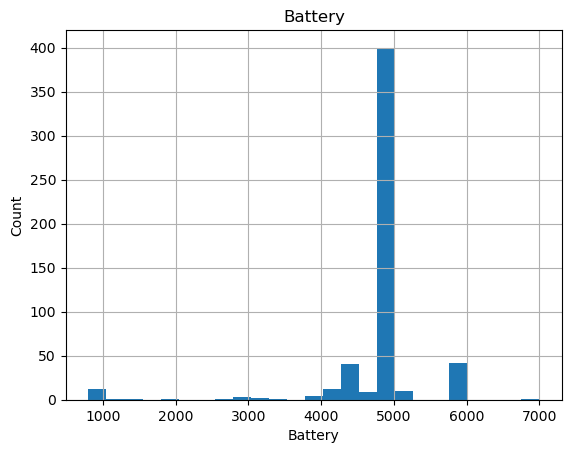

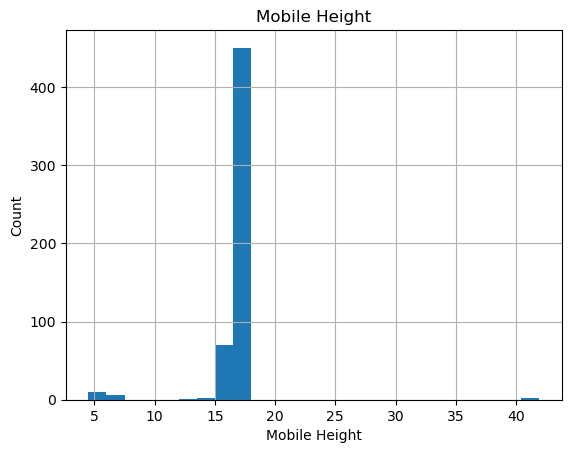

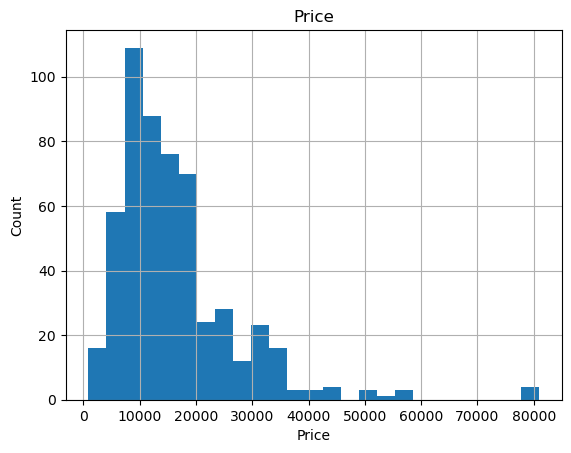

In [20]:

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

 >prices is right-skewed, it means that the majority of mobile prices are concentrated towards the lower end of the price range, with a few high-priced outliers pulling the mean or median price upwards. 

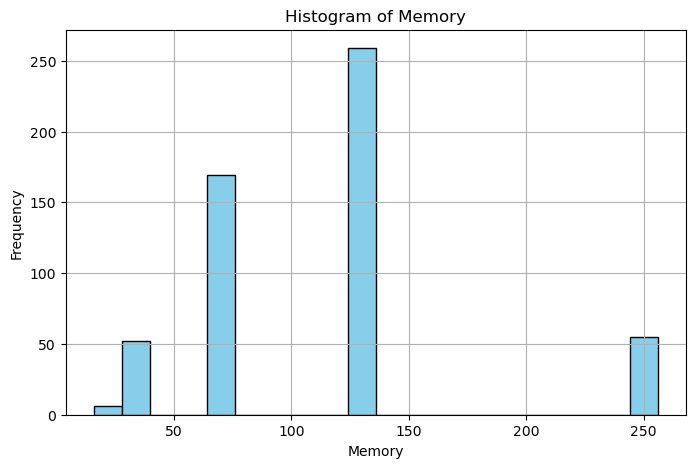

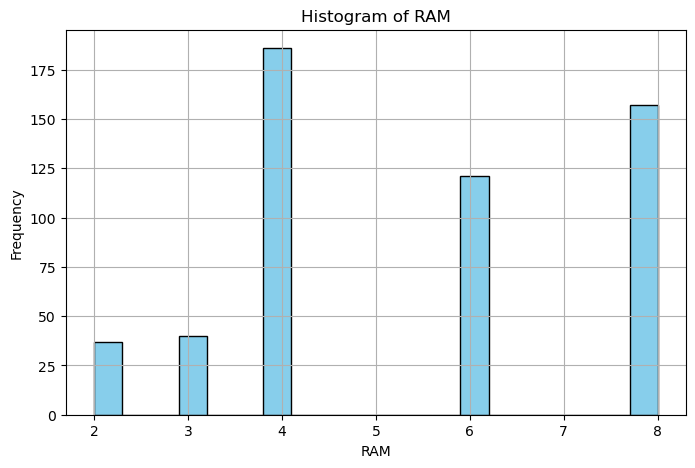

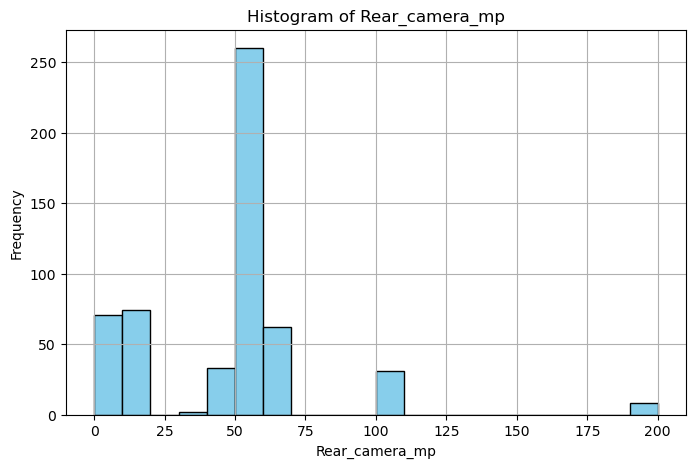

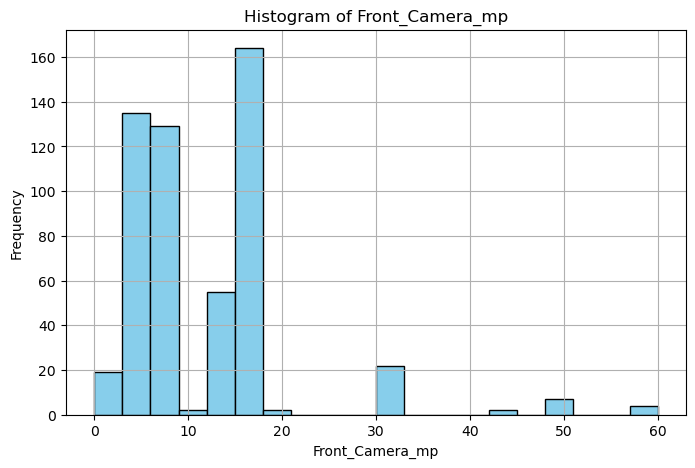

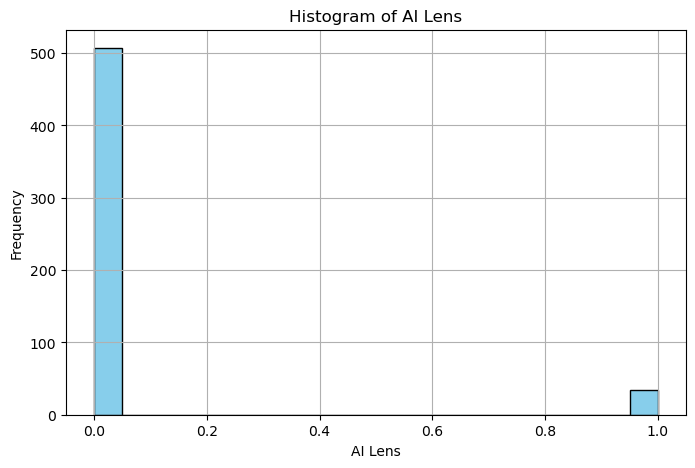

In [21]:
for col in discrete_feature:
        plt.figure(figsize=(8, 5))
        plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

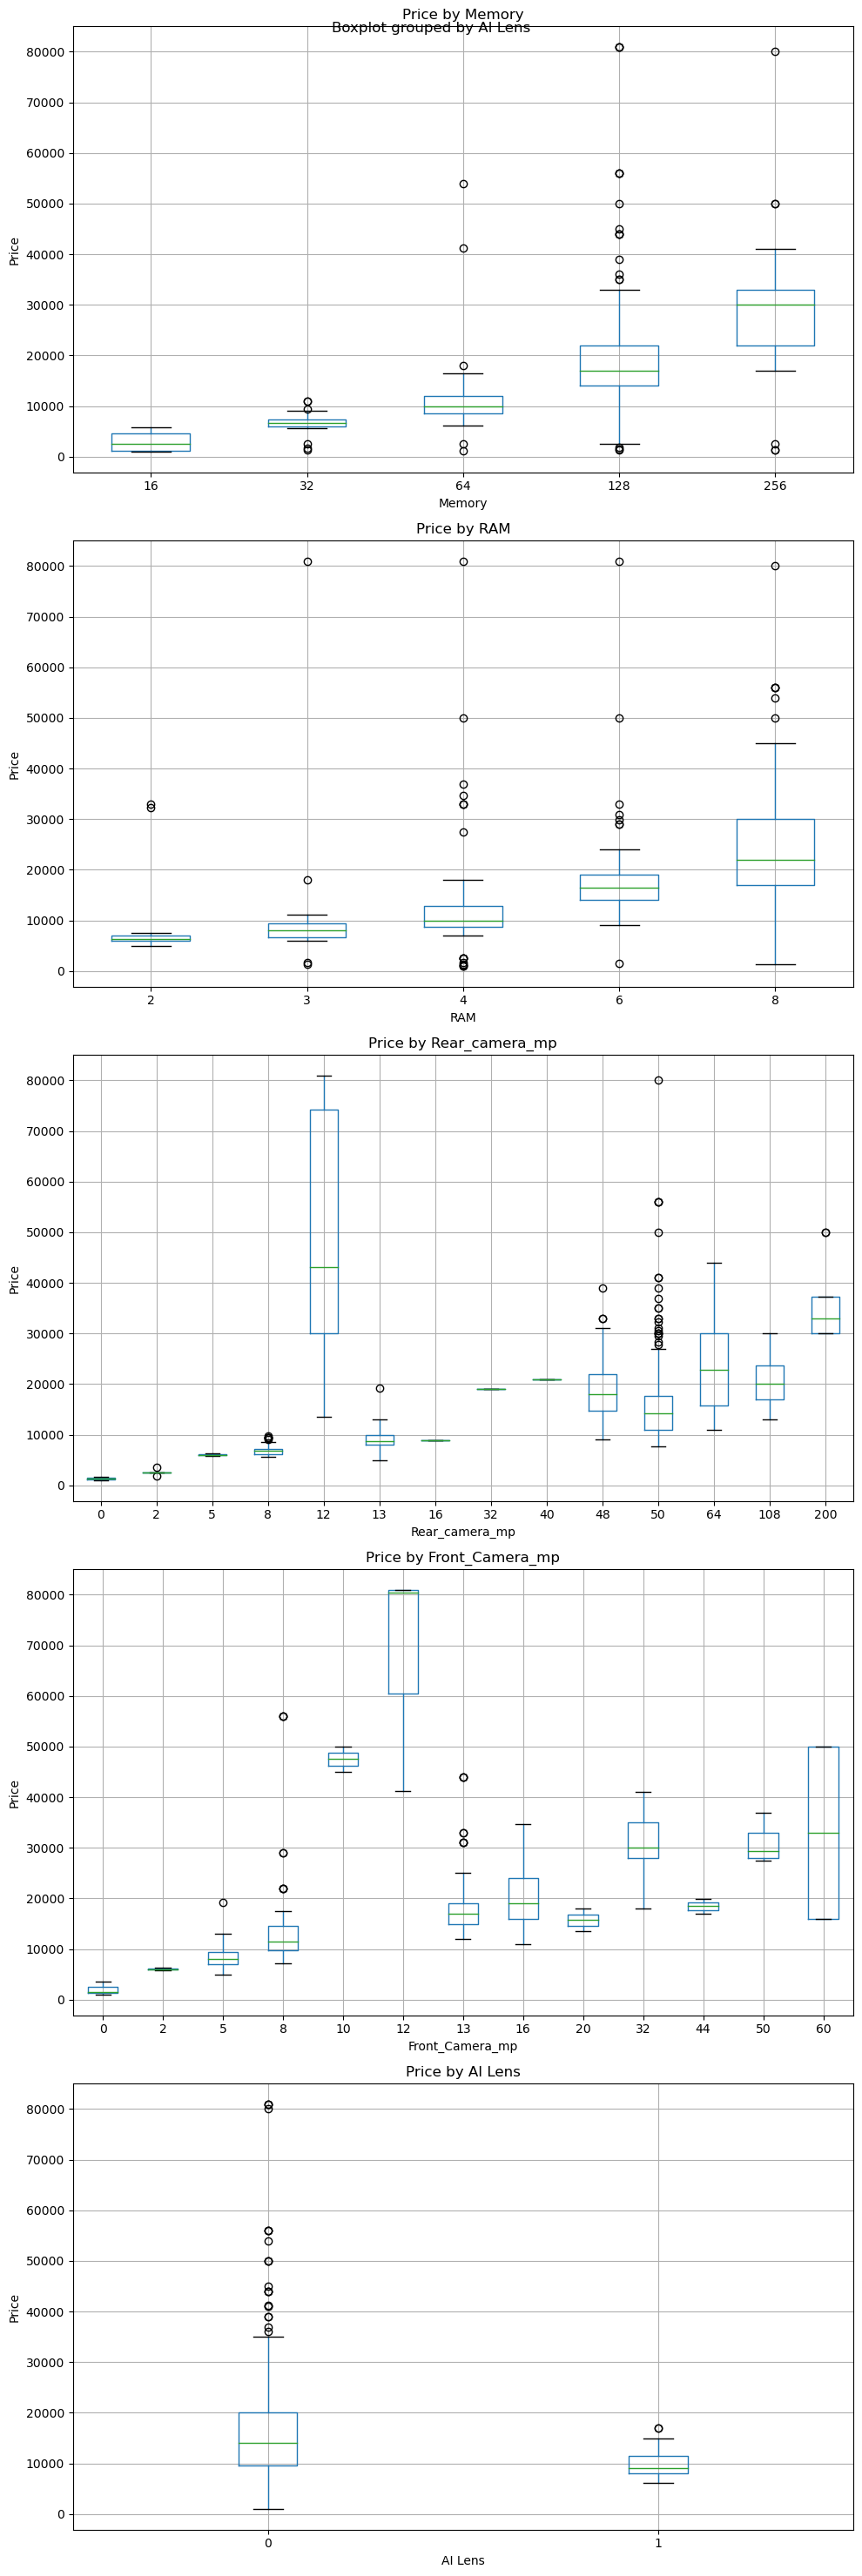

In [22]:
fig, axes = plt.subplots(nrows=len(discrete_feature), ncols=1, figsize=(10, 6*len(discrete_feature)))

for i, feature in enumerate(discrete_feature):
    ax = axes[i]
    df.boxplot(column='Price', by=feature, ax=ax)
    ax.set_title(f'Price by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.grid(True)

plt.tight_layout()
plt.show()

>Here we found that there is a positive correlation between sales price and discreate feature there are outliers present in the discreate featuret 

# Outliers:

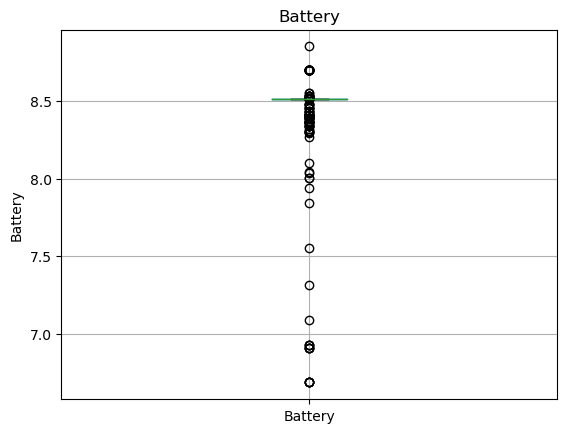

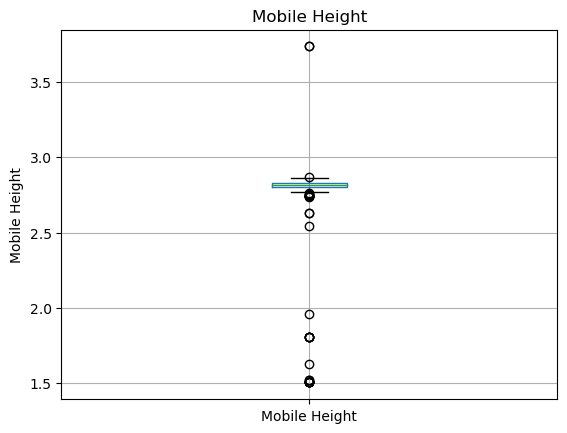

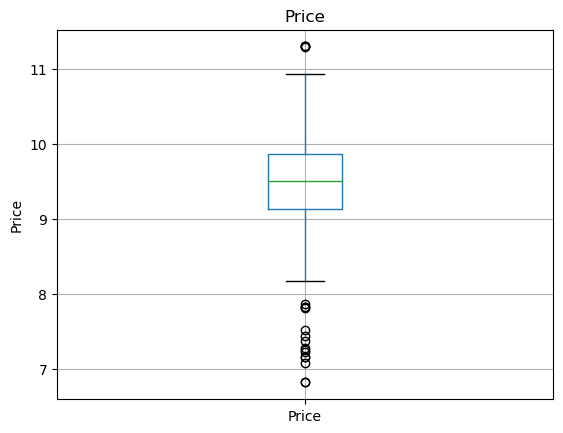

In [23]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

> Here we found that there are outliers in the data set and we need to deal with the outliers**

# Finfing out the categotical varaiable in the data set

In [24]:
def get_categorical_features(data):
    categorical_columns = data.select_dtypes(include=['object', 'category'])
    return categorical_columns

categorical_features = get_categorical_features(df)
categorical_features.head()


,Model,Colour,Processor
0,Infinix SMART 7,Night Black,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,G37


In [25]:
# unique value for categorical variables:

for column in df.columns:
    if df[column].dtype =="object":
        print(column.upper(), ": ",df[column].nunique())
        print(df[column].value_counts())
        print("\n")
        print("*"*65)
        print("\n")

MODEL :  187
vivo Y16                              9
realme C55                            9
SAMSUNG Galaxy A14 5G                 9
REDMI Note 12 Pro 5G                  9
vivo T1 44W                           8
Infinix HOT 30i                       8
REDMI 10                              8
SAMSUNG Galaxy F14 5G                 8
vivo T2x 5G                           8
realme C33 2023                       6
realme 9i 5G                          6
REDMI Note 12                         6
REDMI K50i 5G                         6
REDMI Note 12 5G                      6
REDMI 11 Prime                        6
realme 10 Pro 5G                      6
POCO M5                               6
POCO X5 Pro 5G                        6
REDMI Note 12 Pro+ 5G                 6
SAMSUNG Galaxy F23 5G                 6
POCO F5 5G                            6
REDMI A1+                             6
realme 10 Pro+ 5G                     6
SAMSUNG Galaxy F13                    6
POCO X4 Pro 5G             

In [26]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Model and number of categories are 187
The feature is Colour and number of categories are 275
The feature is Processor and number of categories are 123


# Find out the relationship between continuous variable and dependent feature SalesPrice

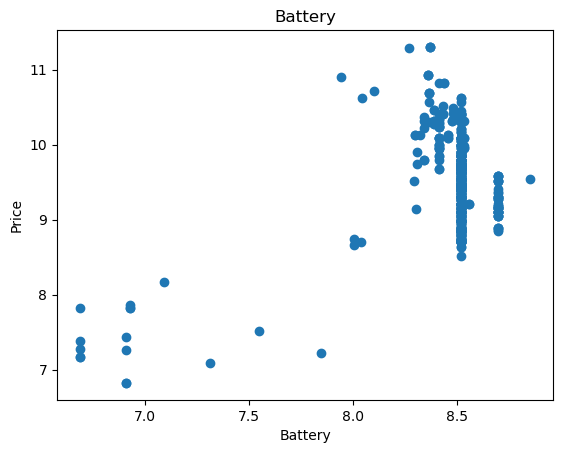

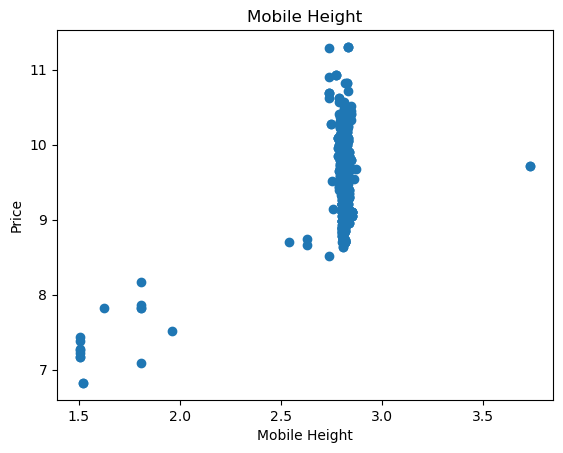

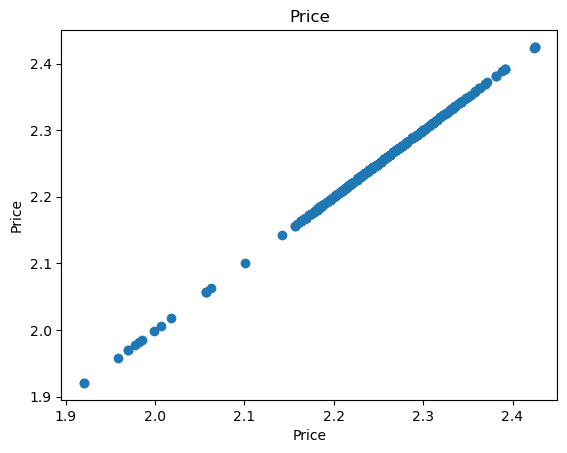

In [27]:

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

>Here we found that there are positive correlation between the continuous varaible and sale sprice but there are outlires which are affecting the price so we need to treat the outliers correctly

# 2. Data Preprocessing

**Converting Categorical values into numerical format: using ordinal encoding**

In [89]:
from sklearn.preprocessing import OrdinalEncoder
encoded_column = ['Model','Colour','Processor']
encoder = OrdinalEncoder()
df[encoded_column] = encoder.fit_transform(df[encoded_column])
df.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,23.0,159.0,64.0,4,5000.0,13.0,5.0,0.0,16.76,113.0,7299.0
1,23.0,20.0,64.0,4,5000.0,13.0,5.0,0.0,16.76,113.0,7299.0
2,37.0,149.0,128.0,8,5000.0,50.0,16.0,0.0,16.64,75.0,11999.0
3,69.0,201.0,32.0,2,5000.0,8.0,5.0,0.0,16.56,56.0,5649.0
4,12.0,130.0,128.0,8,5000.0,50.0,5.0,0.0,16.76,14.0,8999.0


In [90]:
df['RAM'].unique()

array([4, 8, 2, 6, 3], dtype=object)

In [91]:
#converting Memory,ram,Battery,and Ai lense to object 

df['RAM'] = df['RAM'].astype('object')
df['Battery'] = df['Battery'].astype('object')
df['AI Lens'] = df['AI Lens'].astype('object')


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            541 non-null    float64
 1   Colour           541 non-null    float64
 2   Memory           541 non-null    float64
 3   RAM              541 non-null    object 
 4   Battery          541 non-null    object 
 5   Rear_camera_mp   541 non-null    float64
 6   Front_Camera_mp  541 non-null    float64
 7   AI Lens          541 non-null    object 
 8   Mobile Height    541 non-null    float64
 9   Processor        541 non-null    float64
 10  Price            541 non-null    float64
dtypes: float64(8), object(3)
memory usage: 46.6+ KB


# replacing outliers with the IQR

In [93]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Model                89.0
Colour              133.0
Memory               64.0
Rear_camera_mp       37.0
Front_Camera_mp      11.0
Mobile Height         0.2
Processor            43.0
Price              7709.0
dtype: float64


In [94]:
# getting column with the outliers:
(((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))==True).any()

AI Lens            False
Battery            False
Colour             False
Front_Camera_mp    False
Memory             False
Mobile Height       True
Model              False
Price               True
Processor          False
RAM                False
Rear_camera_mp     False
dtype: bool

In [95]:

def replace_outliers_with_iqr(data, threshold=1.5):
   
    numerical_columns = data.select_dtypes(include=['number']).columns
    
    for col in numerical_columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        data[col] = data[col].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else data[col].median())
    
    return data



df = replace_outliers_with_iqr(df)


In [96]:
(((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))==True).any()

AI Lens            False
Battery            False
Colour             False
Front_Camera_mp    False
Memory             False
Mobile Height      False
Model              False
Price              False
Processor          False
RAM                False
Rear_camera_mp     False
dtype: bool

In [97]:
df.shape

(541, 11)

In [102]:
df_clean = df.copy()

In [103]:
df_clean.to_csv('MasterNew.csv')

> Here outliers are removed from the data set

# Feature extraction

In [104]:
#Feature affeting the price:

df_clean.corr(numeric_only = True)['Price'].sort_values(ascending = False)

Price              1.000000
Memory             0.671800
Rear_camera_mp     0.640945
Front_Camera_mp    0.628392
Mobile Height      0.165590
Model              0.160007
Colour             0.119252
Processor         -0.051439
Name: Price, dtype: float64

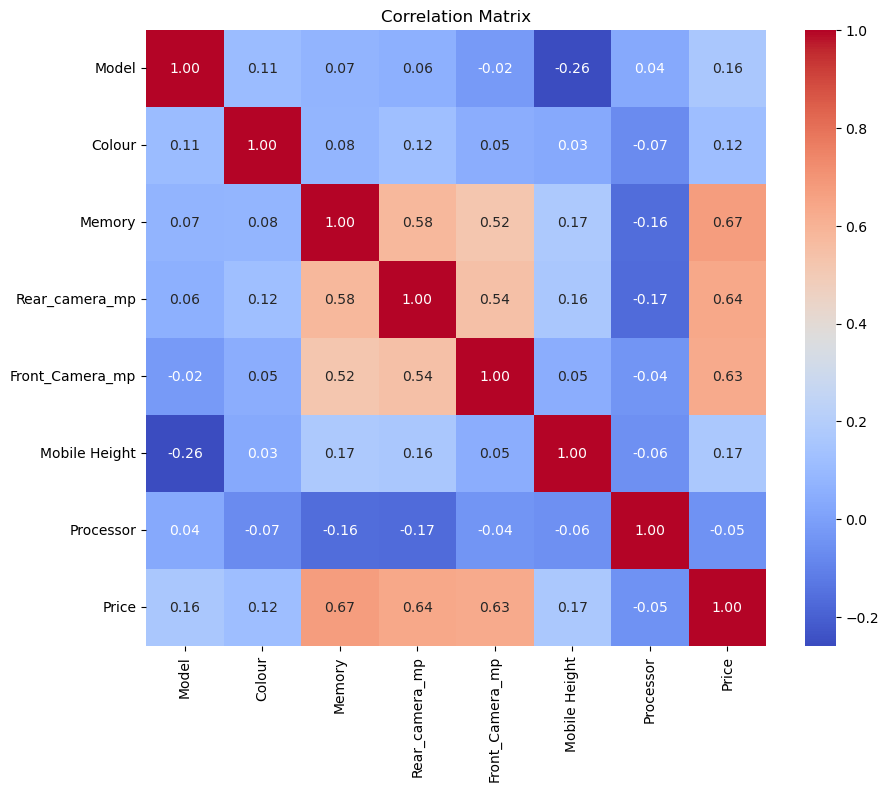

In [113]:
# Calculate correlation matrix
corr_matrix = df_clean.corr()

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

>Here we found that Storage capacity  is the most important feature affecting the price of mobile phone followed by Rear camera megapixel

<Axes: xlabel='Memory', ylabel='Price'>

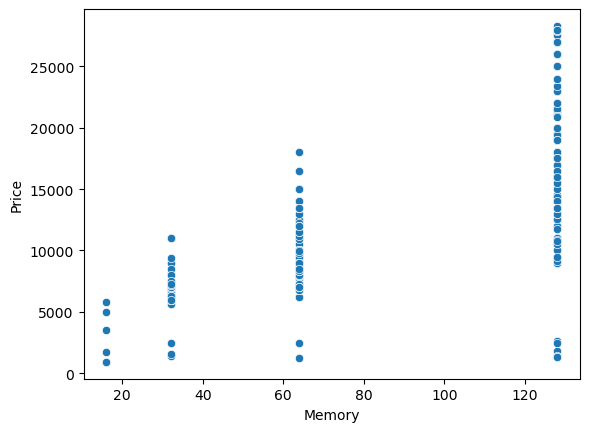

In [114]:
sns.scatterplot(data =df_clean, x='Memory', y='Price')

>**Finding- Here we can see as memory storage increases price of the product also increases**

# 4. Model Building

In [115]:
df_clean

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
0,23.0,159.0,64.0,4,5000.0,13.0,5.0,0.0,16.76,113.0,7299.0
1,23.0,20.0,64.0,4,5000.0,13.0,5.0,0.0,16.76,113.0,7299.0
2,37.0,149.0,128.0,8,5000.0,50.0,16.0,0.0,16.64,75.0,11999.0
3,69.0,201.0,32.0,2,5000.0,8.0,5.0,0.0,16.56,56.0,5649.0
4,12.0,130.0,128.0,8,5000.0,50.0,5.0,0.0,16.76,14.0,8999.0
5,12.0,88.0,128.0,8,5000.0,50.0,5.0,0.0,16.76,14.0,8999.0
6,12.0,151.0,128.0,8,5000.0,50.0,5.0,0.0,16.76,14.0,8999.0
7,12.0,65.0,128.0,8,5000.0,50.0,5.0,0.0,16.76,14.0,8999.0
8,12.0,65.0,64.0,4,5000.0,50.0,5.0,0.0,16.76,14.0,7999.0
9,12.0,151.0,64.0,4,5000.0,50.0,5.0,0.0,16.76,14.0,7999.0


In [117]:
X = df_clean.drop('Price',axis=1)
y = df_clean['Price']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [119]:
X_train.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor
329,3.0,274.0,128.0,8,5000.0,50.0,16.0,0.0,16.64,87.0
16,12.0,130.0,64.0,4,5000.0,50.0,5.0,0.0,16.76,14.0
85,153.0,252.0,64.0,4,5000.0,64.0,8.0,0.0,16.71,21.0
518,91.0,182.0,128.0,8,5000.0,64.0,16.0,0.0,16.76,8.0
407,9.0,195.0,64.0,4,5000.0,13.0,8.0,0.0,16.71,115.0


In [120]:
y_train.head()

329    13499.0
16      7999.0
85     10999.0
518    13499.0
407     8999.0
Name: Price, dtype: float64

# Standard scaler

In [121]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [122]:
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [123]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = X_test.columns)

In [124]:
x_train_scaled.head()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor
0,-1.770429,1.716825,0.791701,1.304180,0.0,0.459218,0.805454,0.0,-0.341271,0.785821
1,-1.600509,-0.111414,-0.957735,-0.715195,0.0,0.459218,-0.973959,0.0,0.336823,-1.465828
2,1.061558,1.437511,-0.957735,-0.715195,0.0,1.189523,-0.488664,0.0,0.054284,-1.249916
3,-0.108997,0.548783,0.791701,1.304180,0.0,1.189523,0.805454,0.0,0.336823,-1.650895
4,-1.657149,0.713833,-0.957735,-0.715195,0.0,-1.470875,-0.488664,0.0,0.054284,1.649467


In [125]:
np.round(x_train_scaled.describe())

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor
count,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0
mean,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
min,-2.0,-2.0,-2.0,-2.0,0.0,-2.0,-2.0,0.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0
50%,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
75%,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
max,2.0,2.0,1.0,1.0,0.0,1.0,3.0,0.0,2.0,2.0


# Linear Regression

In [126]:
linearmodel = LinearRegression()

In [127]:
linearmodel.fit(X_train,y_train)

LinearRegression()

In [128]:
linearmodel.score(X_test,y_test)

0.7124750398286017

In [129]:
linearmodel.coef_

array([1.60506068e+01, 9.27347652e-01, 3.23860864e+01, 5.62718716e+02,
       1.36424205e-12, 6.92354531e+01, 2.00248601e+02, 0.00000000e+00,
       2.35488860e+03, 6.15265738e+00])

# Predict the model

In [130]:
y_pred = linearmodel.predict(X_test)

In [131]:
y_pred

array([17148.66791254, 15155.42157156, 15799.42013969, 14680.81215879,
       17705.34121477, 16620.3539577 , 10701.84990047,  7029.79792459,
       12066.80003198,  4810.65849621,  6812.78752747, 17110.70119014,
       15018.17411907, 16990.14599539, 19445.22319783, 11273.42501466,
        8229.10586268,  7544.66235942, 17566.82399961,  6360.32860516,
        7827.54598704, 17403.9249649 ,  6743.31136547,  9463.06130262,
       10164.05154834, 19739.18702048, 16274.34548475, 14614.63245841,
       16138.3048638 ,  7283.64800448, 19168.86740101, 12106.88503096,
       14255.49997478,  6675.81686272, 16771.80478042, 11579.64649829,
       11851.30699142,  7468.22116486, 11281.3711595 , 18080.62516679,
       11783.02133082, 19448.00524079, 10268.31463631, 18413.04295186,
       17301.09811833, 10285.53409074,  7630.90944441, 13023.77236357,
       17122.26511611, 15739.89900434,  9169.70532854,  7097.66727714,
       17571.28275858,  5884.16662175,  7570.63184703, 11378.74266295,
      

In [140]:
# Errors:
test_residuals = y_test - y_pred

In [142]:

def create_dataframe(column1, column2,column3,col_name1='Column 1', col_name2='Column 2',col_name3='Column 3'):
    
    if len(column1) != len(column2):
        raise ValueError("Both columns must have the same length.")
    
    data = {col_name1: column1, col_name2: column2,col_name3:column3}
    df = pd.DataFrame(data)
    return df


Predicted_price = y_pred
actual_price= y_test

comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)

     Predicted price  Actual price        Error
499     17148.667913       16999.0  -149.667913
486     15155.421572       17499.0  2343.578428
65      15799.420140       14490.0 -1309.420140
41      14680.812159       10999.0 -3681.812159
326     17705.341215       13499.0 -4206.341215
403     16620.353958       13499.0 -3121.353958
514     10701.849900       11999.0  1297.150100
250      7029.797925        1199.0 -5830.797925
47      12066.800032        9999.0 -2067.800032
172      4810.658496        5999.0  1188.341504
383      6812.787527        9499.0  2686.212473
261     17110.701190       21999.0  4888.298810
528     15018.174119       17499.0  2480.825881
260     16990.145995       21999.0  5008.854005
465     19445.223198       13499.0 -5946.223198
119     11273.425015       11999.0   725.574985
244      8229.105863        3549.0 -4680.105863
479      7544.662359        8999.0  1454.337641
107     17566.824000       15999.0 -1567.824000
247      6360.328605         920.0 -5440

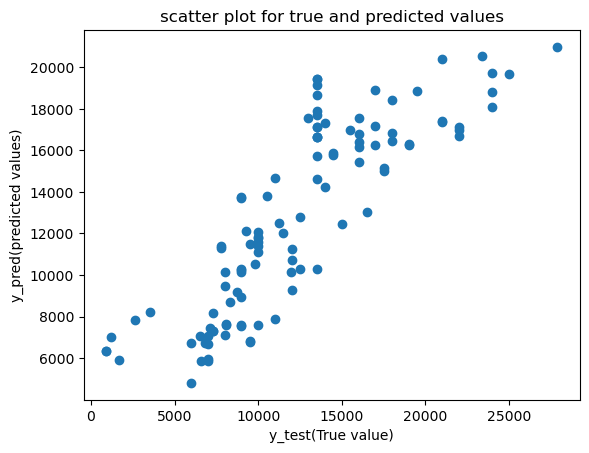

In [132]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test(True value)')
plt.ylabel('y_pred(predicted values)')
plt.title('scatter plot for true and predicted values')
plt.show()

# Model Evaluation

In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [134]:
df['Price'].mean()

13271.035120147875

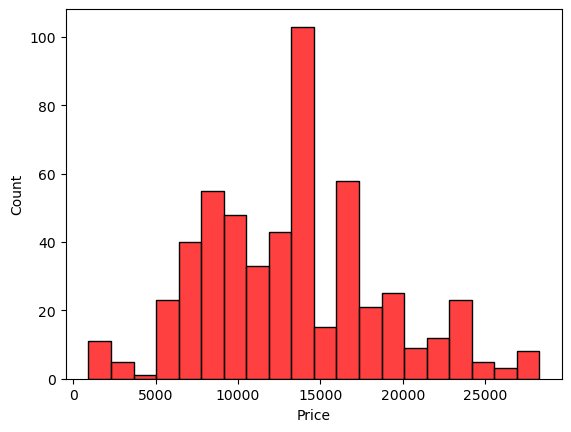

In [135]:
sns.histplot(data=df,x='Price',bins = 20,color = 'red')
plt.show()

**From the above graph we found that maximum number of mobile cost between 8000 to 12000**

In [143]:
mean_absolute_error(y_test,y_pred)

2368.706820951368

In [144]:
mean_squared_error(y_test,y_pred)

8793489.658870343

In [145]:
metrics.explained_variance_score(y_test,y_pred)

0.718058332803805

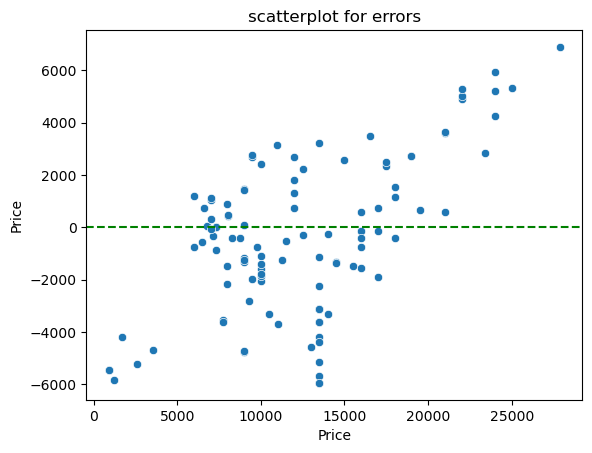

In [146]:
sns.scatterplot(x = y_test,y =test_residuals)
plt.axhline(y=0,color = 'g',ls = '--')
plt.title('scatterplot for errors')
plt.show()

# No clear line or curve we should not prefer the linear regression

# Feature Important analysis

In [147]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear_camera_mp',
       'Front_Camera_mp', 'AI Lens', 'Mobile Height', 'Processor'],
      dtype='object')

In [148]:
coeff_analysis =pd.DataFrame(linearmodel.coef_,X.columns,columns = ['coeff'])

In [149]:
coeff_analysis.sort_values('coeff',ascending = False)

,coeff
Mobile Height,2.354889e+03
RAM,5.627187e+02
Front_Camera_mp,2.002486e+02
Rear_camera_mp,6.923545e+01
Memory,3.238609e+01
Model,1.605061e+01
Processor,6.152657e+00
Colour,9.273477e-01
Battery,1.364242e-12
AI Lens,0.000000e+00


**Ram is the most relevant feature affect the price of mobile followed by Front mega pixel camera followed by mobile height**

# Decision tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [151]:
dtmodel.score(X_test,y_test)

0.6055045871559633

In [152]:
base_pred = dtmodel.predict(X_test)
base_pred

array([16999., 16999., 14490., 10999., 13499., 13499., 11980., 11999.,
        9999.,  5999.,  9499., 21999., 17499., 19990., 24999., 12499.,
        2499.,  8999., 15999.,  2499., 11999., 20999.,  6960.,  7999.,
       12499., 23999., 16999., 13490., 15999.,  6799., 13499.,  9290.,
       13999.,  6999., 15999.,  9999.,  9999.,  7245.,  7749., 23999.,
        9999., 13499., 13499., 17999., 13999., 10999.,  8749., 16499.,
       13499., 16499.,  8749.,  7999., 12999.,  2499.,  8749.,  9499.,
       13499., 17999.,  8999., 10999., 10499., 15999., 13499., 14490.,
        9499., 10999., 19990., 17999., 13499.,  9999.,  6499., 28298.,
       20999.,  8999.,  9999.,  5990.,  8460.,  6799., 11999., 28298.,
       13499., 12272.,  6999., 13499., 13499.,  7299., 14999., 13499.,
        8999., 17999., 15999., 23999., 19499.,  6999.,  8999.,  8999.,
        7749., 16999.,  6999., 13499.,  8999., 10999., 13499., 12499.,
       16999.,  2499., 10989., 14385.,  6599.])

In [153]:
from sklearn.metrics import classification_report,confusion_matrix

In [154]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       1.00      1.00      1.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6960.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7299.0       1.00      0.33      0.50         3
      7749.0       0.50    

In [155]:
print(confusion_matrix(y_test,base_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [156]:
dtmodel.feature_importances_

array([0.28627736, 0.13049384, 0.03543078, 0.12000751, 0.        ,
       0.04361409, 0.0789482 , 0.        , 0.08726558, 0.21796264])

In [157]:
X.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear_camera_mp',
       'Front_Camera_mp', 'AI Lens', 'Mobile Height', 'Processor'],
      dtype='object')

In [158]:
pd.DataFrame(index = X.columns,data = dtmodel.feature_importances_,
            columns = ['Feature Importance']).sort_values('Feature Importance',ascending = False)

,Feature Importance
Model,0.286277
Processor,0.217963
Colour,0.130494
RAM,0.120008
Mobile Height,0.087266
Front_Camera_mp,0.078948
Rear_camera_mp,0.043614
Memory,0.035431
Battery,0.000000
AI Lens,0.000000


**according to decison tree model is the feature which affect the price most** 

Text(0.5, 1.0, 'correlation analysis of most relevant features')

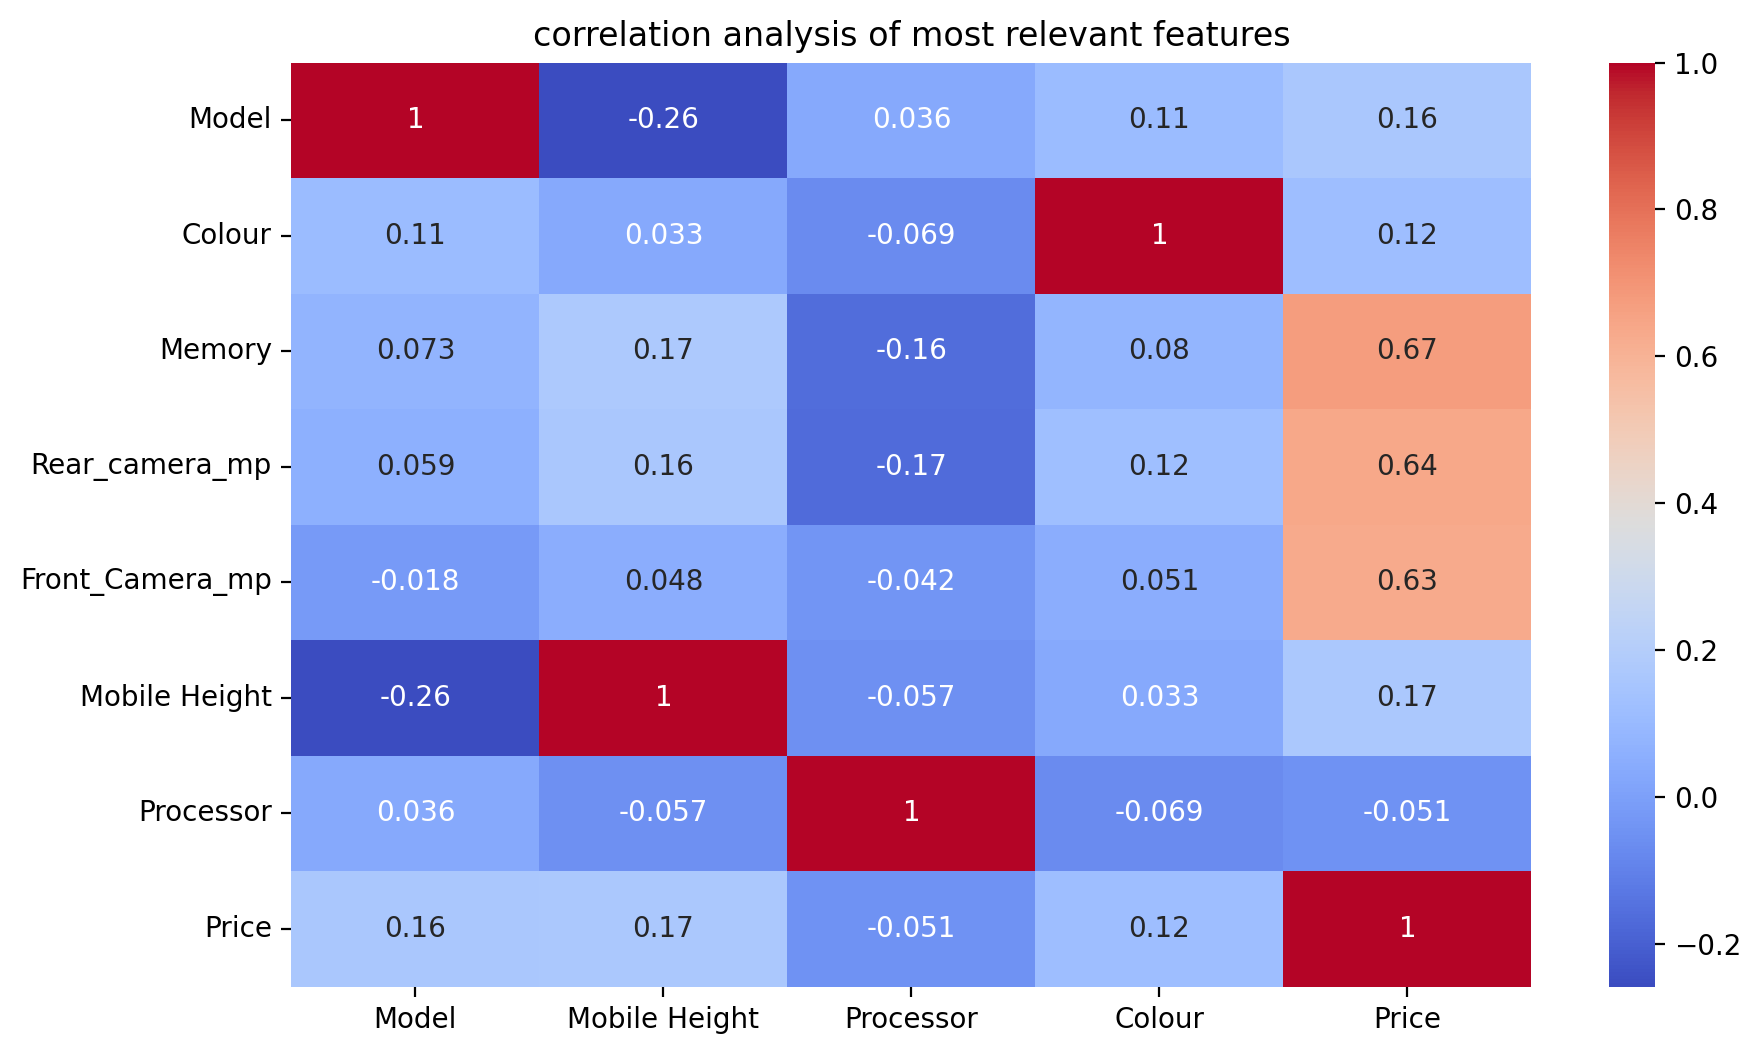

In [159]:
plt.figure(figsize = (10,6),dpi = 200)
sns.heatmap(df.corr()[['Model','Mobile Height','Processor','Colour','Price']],annot = True,cmap = 'coolwarm')
plt.title('correlation analysis of most relevant features')

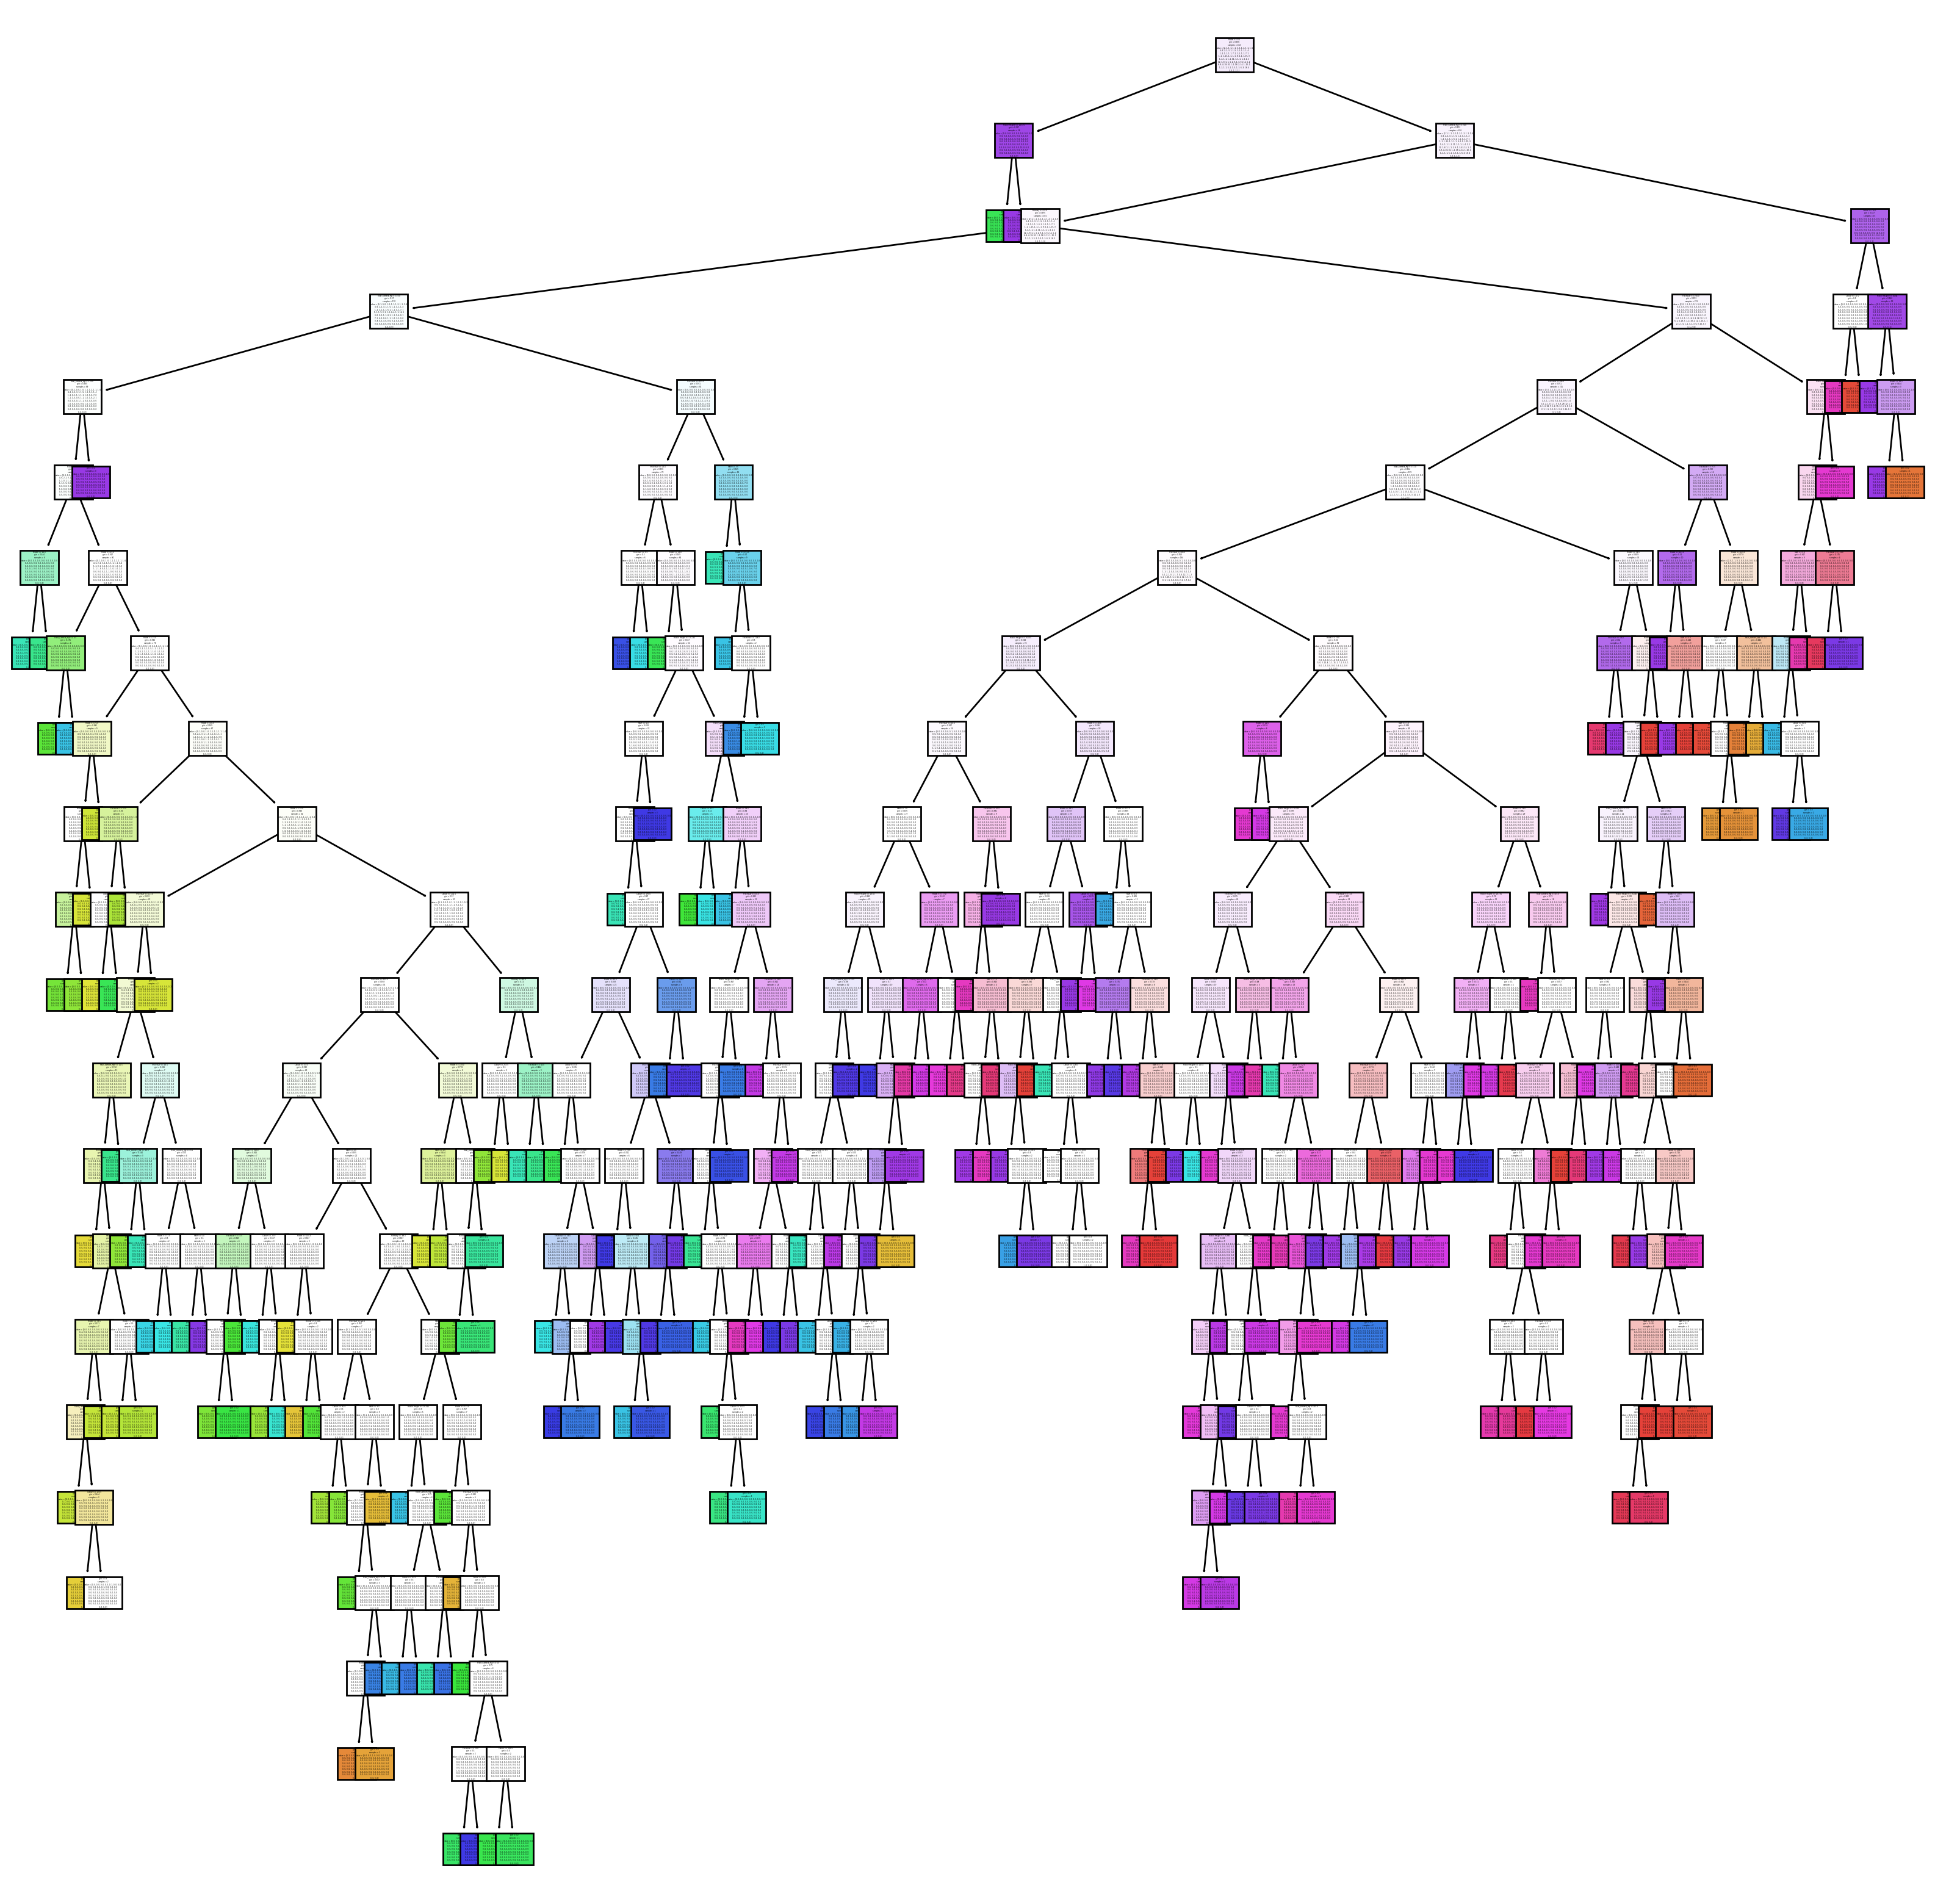

In [160]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,20),dpi = 200)
plot_tree(dtmodel,feature_names = X.columns,filled = True);

In [162]:
def report_model(dtmodel):
    based_pred = dtmodel.predict(X_test)
    print(classification_report(y_test,base_pred))
    print('\n')


In [163]:
report_model(dtmodel)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       1.00      1.00      1.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6960.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7299.0       1.00      0.33      0.50         3
      7749.0       0.50    

**Here the accuracy is 0.61**

In [164]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [165]:
report_model(pruned_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       1.00      1.00      1.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6960.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7299.0       1.00      0.33      0.50         3
      7749.0       0.50    

**Here accuracy is 0.55**

In [166]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)
max_leaf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [167]:
report_model(max_leaf_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       1.00      1.00      1.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6960.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7299.0       1.00      0.33      0.50         3
      7749.0       0.50    

**Here accuracy is 0.55**

In [168]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [169]:
report_model(entropy_tree)

              precision    recall  f1-score   support

       920.0       0.00      0.00      0.00         2
      1199.0       0.00      0.00      0.00         1
      1699.0       0.00      0.00      0.00         1
      2499.0       0.00      0.00      0.00         0
      2615.0       0.00      0.00      0.00         1
      3549.0       0.00      0.00      0.00         1
      5990.0       0.00      0.00      0.00         0
      5999.0       1.00      0.50      0.67         2
      6499.0       1.00      1.00      1.00         1
      6599.0       1.00      1.00      1.00         1
      6794.0       0.00      0.00      0.00         1
      6799.0       0.00      0.00      0.00         0
      6960.0       0.00      0.00      0.00         0
      6999.0       1.00      1.00      1.00         4
      7115.0       0.00      0.00      0.00         1
      7245.0       0.00      0.00      0.00         0
      7299.0       1.00      0.33      0.50         3
      7749.0       0.50    

**Here accuracy is 0.61**

In [171]:
 from sklearn.ensemble import RandomForestRegressor

In [172]:
df_clean.tail()

,Model,Colour,Memory,RAM,Battery,Rear_camera_mp,Front_Camera_mp,AI Lens,Mobile Height,Processor,Price
536,118.0,49.0,128.0,8,5000.0,50.0,12.0,0.0,16.71,89.0,13499.0
537,32.0,52.0,32.0,2,5000.0,5.0,2.0,0.0,16.71,68.0,5998.0
538,123.0,259.0,64.0,4,5000.0,50.0,8.0,0.0,16.76,35.0,9990.0
539,110.0,17.0,128.0,8,5000.0,50.0,32.0,0.0,16.26,11.0,13499.0
540,59.0,215.0,128.0,4,5000.0,50.0,8.0,0.0,16.66,57.0,15999.0


In [173]:
model = RandomForestRegressor()

In [174]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [175]:
predictions = model.predict(X_train)
print('the model score is:', model.score(X_train,y_train))

the model score is: 0.9692749389035896


**we found that model score for random forest is higher then any other model**

In [176]:
# Make the prediction:
new_data = X_test
y_pred = model.predict(new_data)


In [178]:


Predicted_price = y_pred
actual_price= y_test
test_residuals = y_test - y_pred
comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)

     Predicted price  Actual price         Error
499     16749.000000       16999.0    250.000000
486     18379.000000       17499.0   -880.000000
65      14662.340000       14490.0   -172.340000
41      10938.250000       10999.0     60.750000
326     14309.920000       13499.0   -810.920000
403     13838.640000       13499.0   -339.640000
514     12690.490000       11999.0   -691.490000
250      1838.960000        1199.0   -639.960000
47      10942.000000        9999.0   -943.000000
172      6118.105000        5999.0   -119.105000
383      8984.170000        9499.0    514.830000
261     18060.840000       21999.0   3938.160000
528     17828.820000       17499.0   -329.820000
260     18270.970000       21999.0   3728.030000
465     14823.260000       13499.0  -1324.260000
119     11942.960000       11999.0     56.040000
244      2902.020000        3549.0    646.980000
479      8850.430000        8999.0    148.570000
107     13958.330000       15999.0   2040.670000
247      1870.480000

In [180]:
mean_absolute_error(y_test,y_pred)


983.6829587155963

In [181]:
mean_squared_error(y_test,y_pred)


2669981.5149831357

In [187]:
metrics.explained_variance_score(y_test,y_pred)

0.9127452230157184

**Here we can see that predicted price is more closer to the actual price in random forest regressor so this model is best as compare to the other model so we must select this model for prediction** 

**Evaluating model performance using R2_score**

In [188]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [189]:
#Predicting the test result

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)


Evalueating the model performance

In [190]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9012534686677687

In [191]:
Predicted_price = y_pred
actual_price= y_test
test_residuals = y_test - y_pred
comparison = create_dataframe(Predicted_price, actual_price,test_residuals,'Predicted price','Actual price','Error')
print(comparison)


     Predicted price  Actual price         Error
499     17349.000000       16999.0   -350.000000
486     19749.000000       17499.0  -2250.000000
65      14541.800000       14490.0    -51.800000
41      10563.700000       10999.0    435.300000
326     15986.500000       13499.0  -2487.500000
403     13899.000000       13499.0   -400.000000
514     12786.800000       11999.0   -787.800000
250      1389.800000        1199.0   -190.800000
47      11048.100000        9999.0  -1049.100000
172      6219.000000        5999.0   -220.000000
383      8660.400000        9499.0    838.600000
261     19549.000000       21999.0   2450.000000
528     17599.000000       17499.0   -100.000000
260     19749.000000       21999.0   2250.000000
465     14749.000000       13499.0  -1250.000000
119     12498.100000       11999.0   -499.100000
244      3067.200000        3549.0    481.800000
479      8673.100000        8999.0    325.900000
107     13398.100000       15999.0   2600.900000
247      1569.000000

In [192]:
mean_absolute_error(y_test,y_pred)

1055.7590214067277

In [193]:
mean_squared_error(y_test,y_pred)


3020004.2514627925

In [194]:
metrics.explained_variance_score(y_test,y_pred)

0.9012549807352781

**Here also we can see that predicted price is very much closer to the actual price**